In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
import math

In [3]:
 import pandas_datareader as pdr

C:\Users\DEBARGHA GHOSH\Anaconda3\envs\tensorflow\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use('fivethirtyeight')

In [8]:
df=pdr.DataReader('RELIANCE.NS',data_source='yahoo',start='2012-01-01',end='2019-12-17' )

In [9]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,354.875000,343.575012,348.399994,353.274994,8598434.0,309.786346
2012-01-03,363.450012,355.174988,356.125000,362.325012,9366982.0,317.722321
2012-01-04,365.475006,356.674988,363.700012,358.075012,8476734.0,313.995514
2012-01-05,362.475006,347.049988,357.500000,349.750000,13239172.0,306.695282
2012-01-06,362.000000,348.325012,348.524994,358.774994,9406294.0,314.609314
...,...,...,...,...,...,...
2019-12-11,1574.500000,1550.599976,1555.599976,1562.400024,5652698.0,1556.555420
2019-12-12,1573.849976,1556.650024,1570.250000,1568.199951,4720977.0,1562.333618
2019-12-13,1590.000000,1572.400024,1580.000000,1582.900024,5791522.0,1576.978760


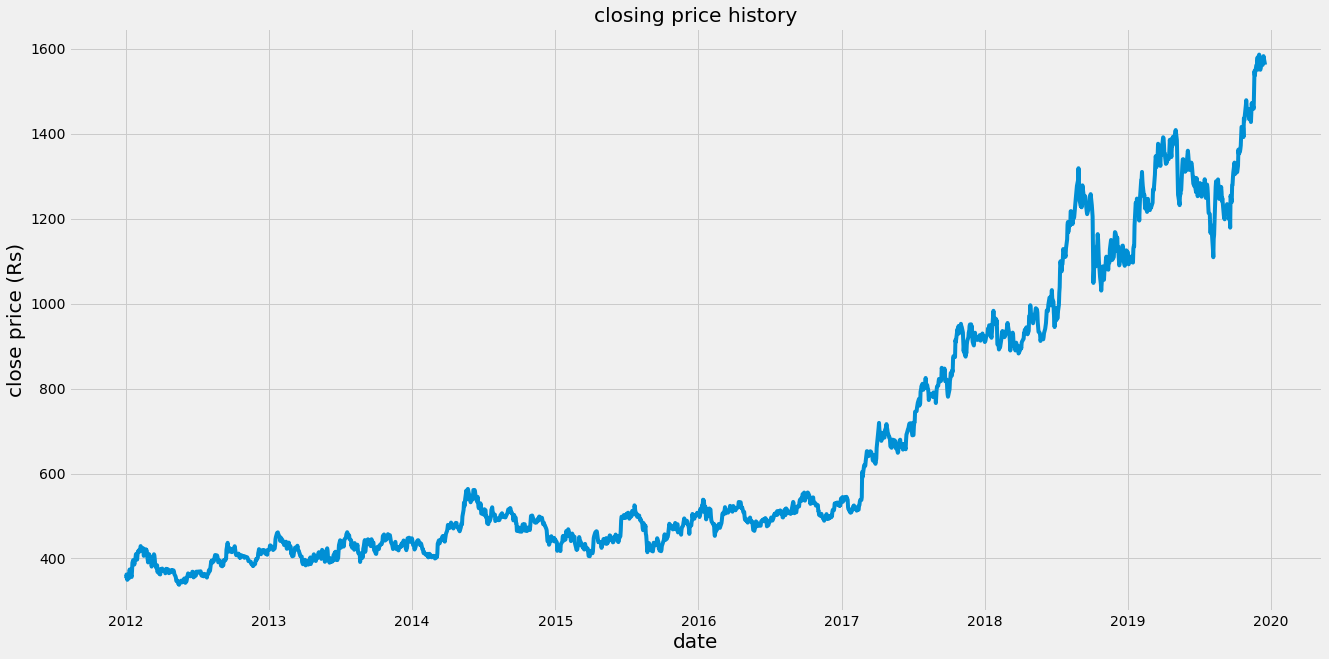

In [10]:
plt.figure(figsize=(20,10))
plt.title('closing price history')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=20)
plt.ylabel('close price (Rs)',fontsize=20)
plt.show()

In [11]:
data=df.filter(['Close'])
print(data)
dataset=data.values
print(dataset)
print(dataset.shape)
training_data_length=math.ceil(len(dataset) * .8)
training_data_length


                  Close
Date                   
2012-01-02   353.274994
2012-01-03   362.325012
2012-01-04   358.075012
2012-01-05   349.750000
2012-01-06   358.774994
...                 ...
2019-12-11  1562.400024
2019-12-12  1568.199951
2019-12-13  1582.900024
2019-12-16  1566.599976
2019-12-17  1562.699951

[1956 rows x 1 columns]
[[ 353.2749939 ]
 [ 362.32501221]
 [ 358.07501221]
 ...
 [1582.90002441]
 [1566.59997559]
 [1562.69995117]]
(1956, 1)


1565

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01219513],
       [0.01944413],
       [0.01603991],
       ...,
       [0.99711644],
       [0.98406022],
       [0.98093632]])

In [14]:
train_data=scaled_data[0:training_data_length,:]

In [15]:
len(train_data)
train_data

array([[0.01219513],
       [0.01944413],
       [0.01603991],
       ...,
       [0.50386478],
       [0.51155434],
       [0.51511877]])

In [16]:
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
         

In [17]:
x_train

[array([0.01219513, 0.01944413, 0.01603991, 0.00937163, 0.01660059,
        0.01207498, 0.02406986, 0.02889584, 0.02435021, 0.02230767,
        0.01475831, 0.02641276, 0.04151148, 0.04387442, 0.0466779 ,
        0.03822741, 0.04311347, 0.04599705, 0.05779168, 0.04751893,
        0.05647002, 0.06211704, 0.06133607, 0.06496056, 0.06283793,
        0.06746366, 0.07301055, 0.07118827, 0.06694302, 0.069346  ,
        0.06920583, 0.06429975, 0.05460773, 0.05691058, 0.06706316,
        0.06299814, 0.0654812 , 0.05761145, 0.04219233, 0.0482198 ,
        0.05793184, 0.05400698, 0.05526853, 0.0486203 , 0.04022989,
        0.03432256, 0.03912852, 0.04904082, 0.05761145, 0.05542874,
        0.04827989, 0.0385478 , 0.03163923, 0.03382194, 0.03682567,
        0.02412992, 0.02721375, 0.02162682, 0.02200729, 0.01986465]),
 array([0.01944413, 0.01603991, 0.00937163, 0.01660059, 0.01207498,
        0.02406986, 0.02889584, 0.02435021, 0.02230767, 0.01475831,
        0.02641276, 0.04151148, 0.04387442, 0.

In [18]:
y_train

[0.01944413006264356,
 0.029836997585629244,
 0.025812011525033096,
 0.030678055137217275,
 0.02839521956058305,
 0.026452820770677288,
 0.026653069076621128,
 0.021706921253184797,
 0.026913377207724132,
 0.030217474255797128,
 0.028835756055910156,
 0.028154931371199787,
 0.02903600436185394,
 0.026252572464733503,
 0.02192718950084832,
 0.024109900924510652,
 0.02362930010137082,
 0.024109900924510652,
 0.027614246278527488,
 0.02639273650114482,
 0.027634266220247228,
 0.027013501360696024,
 0.02513116239594948,
 0.020165019075166657,
 0.015859680497374518,
 0.012916015733376418,
 0.007609435625865191,
 0.007228983400070554,
 0.008450493177453167,
 0.0020825872706903836,
 0.0022227757514750035,
 0.0,
 0.003624513893081771,
 0.004986187706875755,
 0.007769644048369551,
 0.006007449178314583,
 0.004305338577792139,
 0.007689539837117343,
 0.006047513506127311,
 0.010232707989227818,
 0.010312787756106723,
 0.01207498262616169,
 0.011814650050685382,
 0.0036645537765211955,
 0.0066682

In [19]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train.shape

(1505, 60)

In [21]:
y_train.shape

(1505,)

In [22]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [23]:
x_train

array([[[0.01219513],
        [0.01944413],
        [0.01603991],
        ...,
        [0.02162682],
        [0.02200729],
        [0.01986465]],

       [[0.01944413],
        [0.01603991],
        [0.00937163],
        ...,
        [0.02200729],
        [0.01986465],
        [0.01944413]],

       [[0.01603991],
        [0.00937163],
        [0.01660059],
        ...,
        [0.01986465],
        [0.01944413],
        [0.029837  ]],

       ...,

       [[0.44379029],
        [0.44563261],
        [0.45376266],
        ...,
        [0.49945931],
        [0.49333175],
        [0.50698867]],

       [[0.44563261],
        [0.45376266],
        [0.448396  ],
        ...,
        [0.49333175],
        [0.50698867],
        [0.50386478]],

       [[0.45376266],
        [0.448396  ],
        [0.46253355],
        ...,
        [0.50698867],
        [0.50386478],
        [0.51155434]]])

In [24]:
x_train.shape

(1505, 60, 1)

In [25]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
1505/1505 [==============================] - 376s 250ms/step - loss: 4.4088e-04
Epoch 2/2
1505/1505 [==============================] - 337s 224ms/step - loss: 2.8315e-04


In [32]:
test_data=scaled_data[training_data_length-60:,:]
x_test=[]
y_test=dataset[training_data_length:,:]
len(test_data)

451

In [33]:
test_data.shape
y_test

array([[ 989.25      ],
       [ 986.59997559],
       [ 978.95001221],
       [ 956.15002441],
       [ 945.34997559],
       [ 933.84997559],
       [ 931.34997559],
       [ 926.75      ],
       [ 912.25      ],
       [ 915.84997559],
       [ 920.79998779],
       [ 920.40002441],
       [ 917.45001221],
       [ 916.09997559],
       [ 921.34997559],
       [ 930.54998779],
       [ 940.84997559],
       [ 947.65002441],
       [ 954.40002441],
       [ 971.34997559],
       [ 984.34997559],
       [ 982.65002441],
       [ 997.15002441],
       [1002.5       ],
       [1007.95001221],
       [1014.20001221],
       [1015.54998779],
       [ 996.04998779],
       [1019.25      ],
       [1031.94995117],
       [1012.5       ],
       [1004.45001221],
       [ 978.95001221],
       [ 965.84997559],
       [ 944.95001221],
       [ 972.45001221],
       [ 960.59997559],
       [ 971.29998779],
       [ 990.09997559],
       [ 964.5       ],
       [ 977.54998779],
       [ 997.099

In [34]:
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
    

In [35]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [36]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [37]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

41.1842307946871

C:\Users\DEBARGHA GHOSH\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


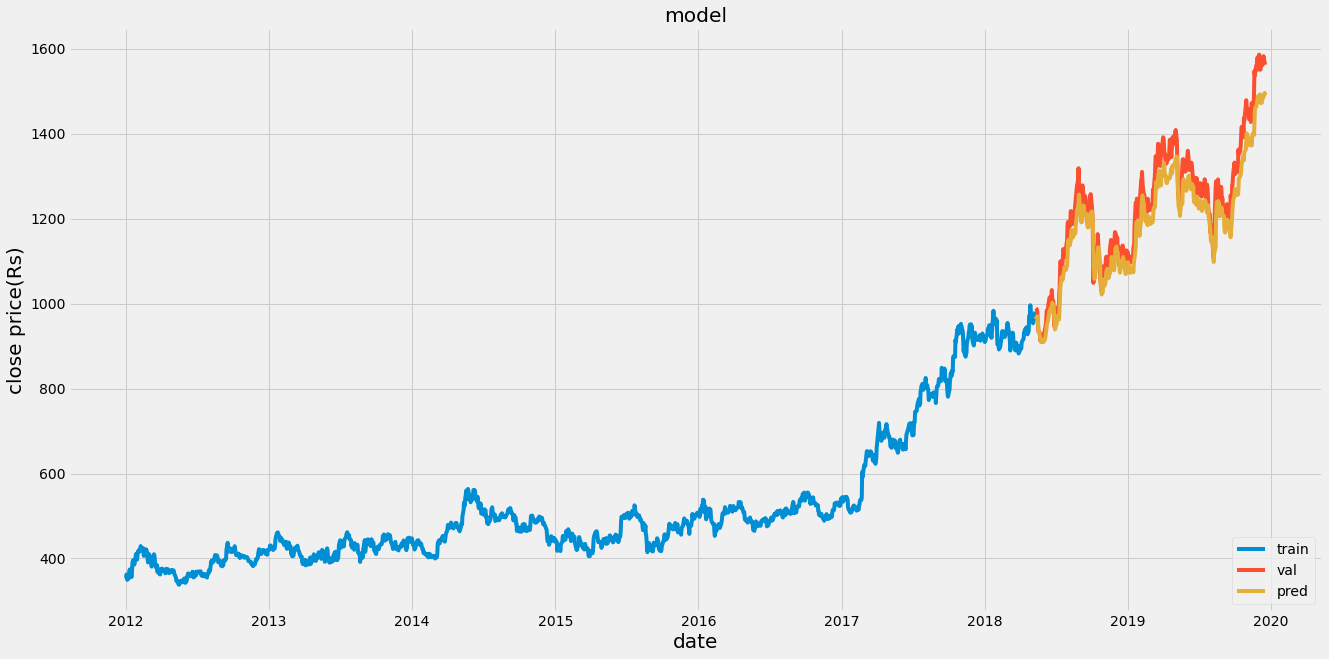

In [38]:
train=data[:training_data_length]
valid=data[training_data_length:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('model')
plt.xlabel('date',fontsize=20)
plt.ylabel('close price(Rs)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','pred'] ,loc='lower right')
plt.show()
